WeatherPy

Analysis:
* Trend 1. The most obvious and predictable observation is that temperature vs latitude plot shows temperatures become higher    as we get closer to the equator.
* Trend 2. Humidity is mostly consistent across different latitudes. 
* Trend 3. It appears that cities fall outside of the 0 to 20  latitude range are are more likely to have less clouds then cities  that fall in 20 to 60 latitude range.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import api_keys

import openweathermapy.core as owm
import gmaps
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# List to hold city weather values
city_weather = {}

settings = {"units":"imperial", "appid": api_key}

print(f"Beginning Data Retrieval") 

# Get current weather per city
counter = 1
setcounter = 1
for city in cities:
    try:
        print(f"Processing Record {counter} of Set {setcounter} | {city}")
        current_city_weather = owm.get_current(city, **settings)
        # Add value to into 
        city_weather[city] = current_city_weather
        counter += 1
        if(counter ==50):
            counter = 0
            setcounter +=1
    except:
        # ignore city and continue on
        continue

Beginning Data Retrieval
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mayor pablo lagerenza
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | lata
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | aswan
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | banda aceh
Processing Record 22 of Set 1 | srednekolymsk
Processing Record 23 of Set 1 | beringovskiy
Processing Record 24 o

Processing Record 28 of Set 4 | lexington park
Processing Record 29 of Set 4 | kondagaon
Processing Record 30 of Set 4 | mortka
Processing Record 31 of Set 4 | moree
Processing Record 32 of Set 4 | gravdal
Processing Record 33 of Set 4 | broken hill
Processing Record 34 of Set 4 | victoria
Processing Record 35 of Set 4 | orange cove
Processing Record 36 of Set 4 | teodoro sampaio
Processing Record 37 of Set 4 | talnakh
Processing Record 38 of Set 4 | sentyabrskiy
Processing Record 38 of Set 4 | saint-joseph
Processing Record 39 of Set 4 | sambava
Processing Record 40 of Set 4 | lapy
Processing Record 41 of Set 4 | amderma
Processing Record 41 of Set 4 | port macquarie
Processing Record 42 of Set 4 | tapes
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | princeton
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | calvinia
Processing Record 47 of Set 4 | flinders
Processing Record 48 of Set 4 | san carlos de bariloche
Processing Record 49 o

Processing Record 12 of Set 8 | libenge
Processing Record 13 of Set 8 | tekeli
Processing Record 14 of Set 8 | dawei
Processing Record 15 of Set 8 | moussoro
Processing Record 16 of Set 8 | shar
Processing Record 17 of Set 8 | sycamore
Processing Record 18 of Set 8 | iowa city
Processing Record 19 of Set 8 | smoky lake
Processing Record 20 of Set 8 | puerto escondido
Processing Record 21 of Set 8 | lentekhi
Processing Record 22 of Set 8 | oktyabrskoye
Processing Record 23 of Set 8 | kano
Processing Record 24 of Set 8 | samagaltay
Processing Record 25 of Set 8 | parfenyevo
Processing Record 26 of Set 8 | salinas
Processing Record 27 of Set 8 | guasdualito
Processing Record 28 of Set 8 | borzya
Processing Record 29 of Set 8 | boende
Processing Record 30 of Set 8 | ust-kan
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | the valley
Processing Record 33 of Set 8 | saint-francois
Processing Record 34 of Set 8 | ngaoundere
Processing Record 35 of Set 8 | nguiu
Processing 

Processing Record 39 of Set 11 | prince rupert
Processing Record 40 of Set 11 | kashmor
Processing Record 41 of Set 11 | gazojak
Processing Record 42 of Set 11 | vikhorevka
Processing Record 43 of Set 11 | bria
Processing Record 44 of Set 11 | hofn
Processing Record 45 of Set 11 | mujiayingzi
Processing Record 46 of Set 11 | santa cruz
Processing Record 47 of Set 11 | cotonou
Processing Record 48 of Set 11 | alexandria
Processing Record 49 of Set 11 | gornouralskiy
Processing Record 49 of Set 11 | villa rica
Processing Record 0 of Set 12 | oussouye
Processing Record 1 of Set 12 | lake havasu city
Processing Record 2 of Set 12 | ksenyevka
Processing Record 2 of Set 12 | nome
Processing Record 3 of Set 12 | misratah
Processing Record 4 of Set 12 | nezhinka
Processing Record 5 of Set 12 | corinto
Processing Record 6 of Set 12 | ferme-neuve
Processing Record 7 of Set 12 | urucara
Processing Record 8 of Set 12 | tungor
Processing Record 9 of Set 12 | nigrita


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Create a date frame 
city_weather_df = pd.DataFrame([[city_weather[city]('name'), city_weather[city]('clouds.all'), city_weather[city]('sys.country'), city_weather[city]('dt'), city_weather[city]('main.humidity'),
city_weather[city]('coord.lat'), city_weather[city]('coord.lon'), city_weather[city]('main.temp_max'), city_weather[city]('wind.speed')]
    for city in city_weather])


# Rename columns
city_weather_df = city_weather_df.rename(columns = {0: "City",
                                                    1: "Cloudiness", 
                                                    2: "Country", 
                                                    3: "Date", 
                                                    4: "Humidity",
                                                    5: "Lat", 
                                                    6: "Lng", 
                                                    7: "Max Temp", 
                                                    8: "Wind Speed"})
    
    
    
    

city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Laguna,40,BZ,1563309395,70,16.17,-88.94,87.80,13.87
1,Ushuaia,75,AR,1563309395,86,-54.81,-68.31,41.00,23.04
2,Mayor Pablo Lagerenza,2,PY,1563309395,32,-19.93,-60.77,76.37,4.38
3,Barrow,100,AR,1563309395,54,-38.31,-60.23,51.17,15.77
4,Lompoc,1,US,1563309396,68,34.64,-120.46,82.99,16.11


In [31]:
# Export data to csv    
city_weather_df.to_csv("city_weather.csv", index = None, header=True)
  

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

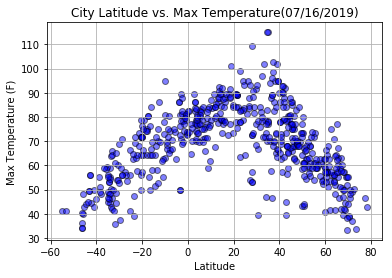

In [65]:
# Scatter plot Latitude vs. Temperature Plot
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"], marker="o", facecolor="blue", edgecolor="black", alpha=0.5)
plt.title("City Latitude vs. Max Temperature(07/16/2019)")

# Create labels for X and Y axis
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save an image of the scatter plot
plt.savefig("MaxTemp_v_Latitude.png")

# Show the scatter plot
plt.show()


#### Latitude vs. Humidity Plot

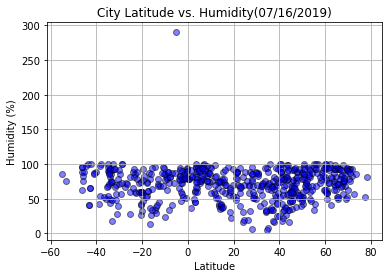

In [67]:
# Scatter plot Latitude vs. Humidity Plot
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"], marker="o", facecolor="blue", edgecolor="black", alpha=0.5)
plt.title("City Latitude vs. Humidity(07/16/2019)")

# Create labels for X and Y axis
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save an image of the scatter plot
plt.savefig("Latitude_v_Humidity.png")

# Show the scatter plot
plt.show()

#### Latitude vs. Cloudiness Plot

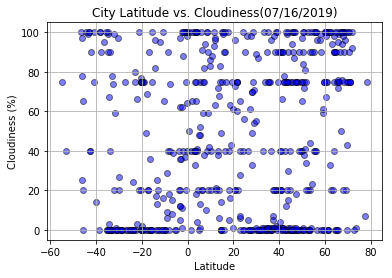

In [68]:
# Scatter plot Latitude vs. Cloudiness Plot
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"], marker="o", facecolor="blue", edgecolor="black", alpha=0.5)
plt.title("City Latitude vs. Cloudiness(07/16/2019)")

# Create labels for X and Y axis
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save an image of the scatter plot
plt.savefig("Latitude_v_Cloudiness.png")

# Show the scatter plot
plt.show()

#### Latitude vs. Wind Speed Plot

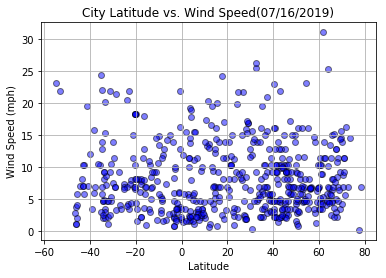

In [69]:
# Scatter plot Latitude vs. Temperature Plot
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"], marker="o", facecolor="blue", edgecolor="black", alpha=0.5)
plt.title("City Latitude vs. Wind Speed(07/16/2019)")

# Create labels for X and Y axis
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save an image of the scatter plot
plt.savefig("Latitude_v_WindSpeed.png")

# Show the scatter plot
plt.show()